Populating the interactive namespace from numpy and matplotlib


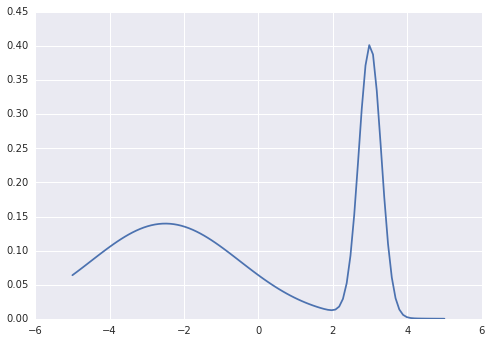

In [9]:
%pylab inline
import scipy.stats
import seaborn as sns

# Define a custom probability density as the mixture of two Gaussians
rv1 = scipy.stats.norm(loc=-2.5, scale=2.0)
rv2 = scipy.stats.norm(loc=3.0, scale=0.3)
weight1 = 0.7
weight2 = 1-weight1
def gaussian_mixture_pdf(x):
    return weight1 * rv1.pdf(x) + weight2 * rv2.pdf(x)

# plot the density
xs = np.linspace(-5, 5, 100)
ps = np.array([gaussian_mixture_pdf(x) for x in xs])
plot(xs, ps)

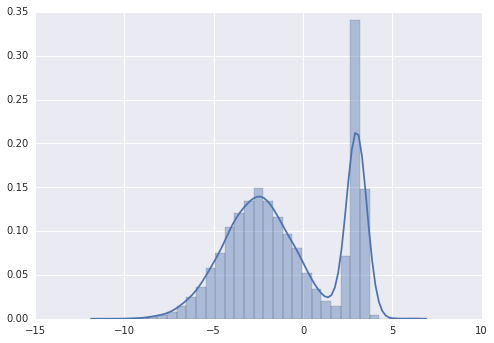

In [11]:
# because this is a simple distribution, we can sample from it directly
def sample_exact():
    u = np.random.rand()
    if u < weight1:
        return rv1.rvs(1)
    else:
        return rv2.rvs(1)

samples = [sample_exact() for i in range(10000)]
sns.distplot(samples)

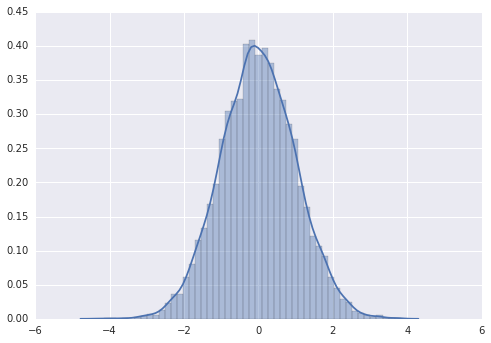

In [16]:
# For educational purposes, we can also use MH to draw samples.
def mh_sample(pdf, n=10000):    
    return np.random.randn(n) # REPLACE THIS with an MH sampling algorithm
    
samples_mh = mh_sample(gaussian_mixture_pdf)
sns.distplot(samples_mh)